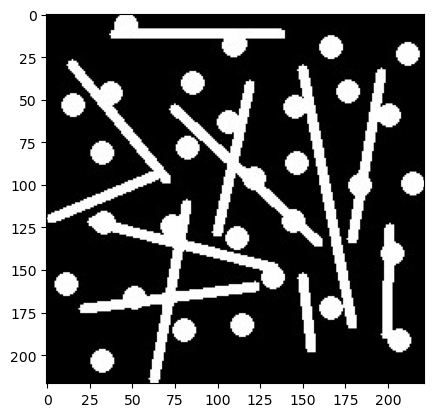

In [42]:
import cv2
import numpy as np

image = cv2.imread('C:/Users/USER/Desktop/Zh/University/Term6/Multimedia/HW/HW1/img3.jpg')

from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
    
#Show the image with matplotlib
plt.imshow(image)
plt.show()

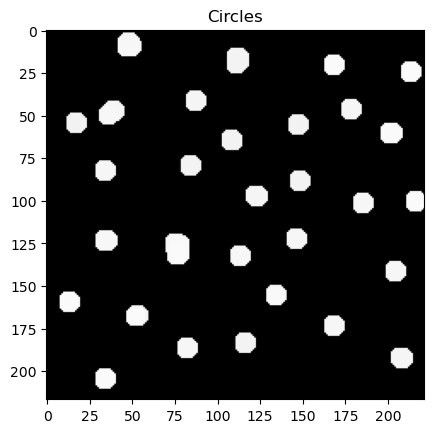

True

In [43]:
# Define our circular kernel 
kernelCirc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (12, 12))

# Use EROSION & DILATION to remove lines
erosion = cv2.erode(image, kernelCirc, iterations = 1)
dilation = cv2.dilate(erosion, kernelCirc, iterations = 1)

# Define a ones kernel to use OPENING for noise canceling
kernel1 = np.ones((6, 6),np.uint8)
opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel1)

# Show & Save Circles
plt.imshow(opening)
plt.title("Circles")
plt.show()
cv2.imwrite('Circles.png', opening)

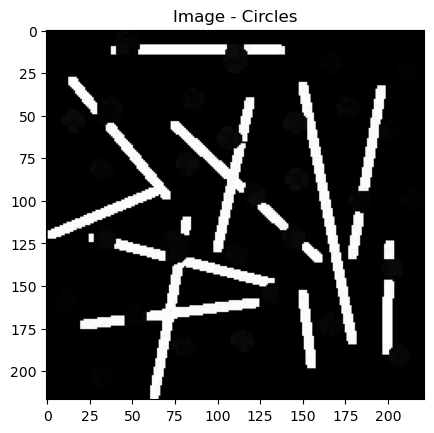

In [44]:
# Remove circles by subtract
lines = image - dilation
opening2 = cv2.morphologyEx(lines, cv2.MORPH_OPEN, np.ones((0, 0),np.uint8))
plt.imshow(opening2)
plt.title("Image - Circles")
plt.show()

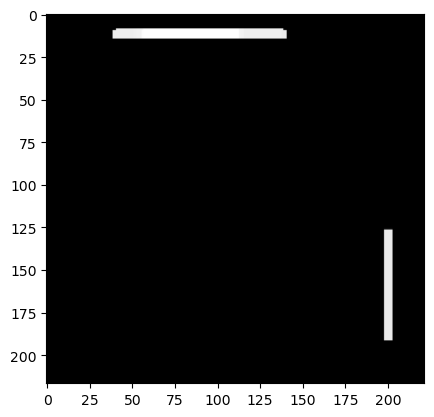

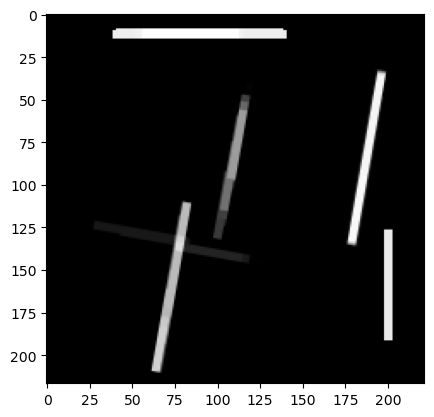

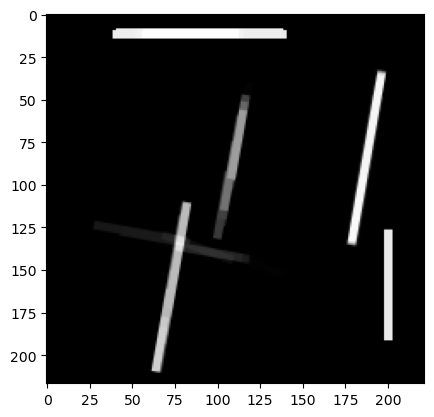

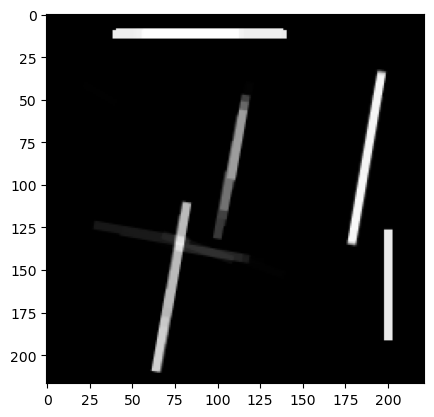

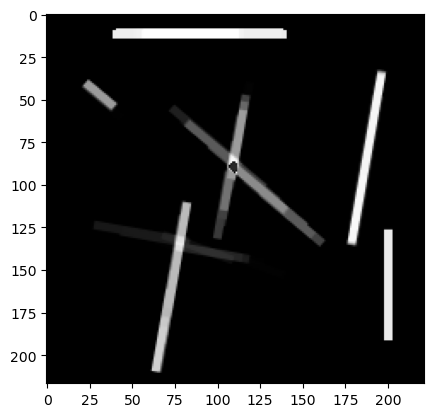

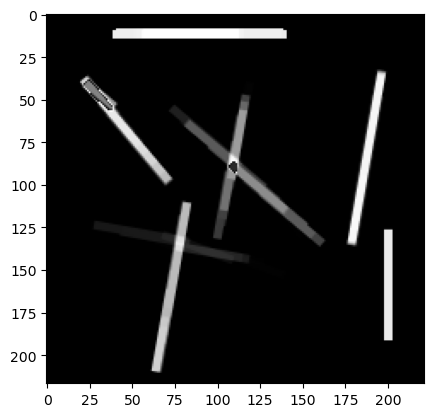

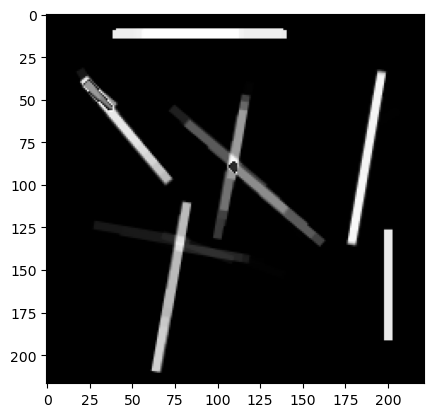

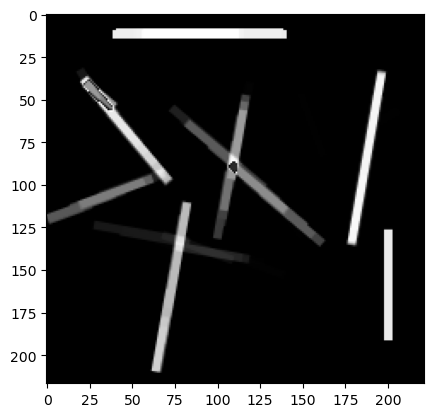

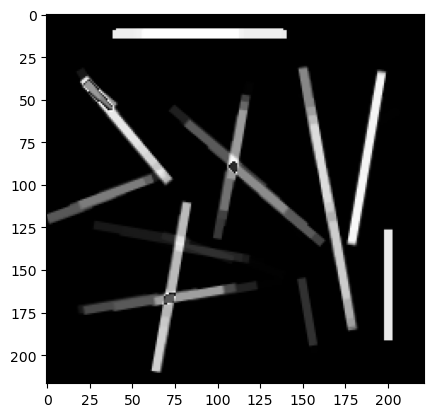

In [45]:
# Define our horizontal & vertical kernels and dimensions of our image
kernelHor = np.ones((5, 40),np.uint8)
kernelVer = np.ones((40, 5),np.uint8)
height, width = image.shape[:2]

# Use EROSION & DILATION to detect horizontal & vertical lines
erosion = cv2.erode(image, kernelHor, iterations = 1)
dilation1 = cv2.dilate(erosion, kernelHor, iterations = 1)
erosion1 = cv2.erode(image, kernelVer, iterations = 1)
dilation2 = cv2.dilate(erosion1, kernelVer, iterations = 1)
result = dilation1 + dilation2

# Rotate our image 10 by 10 degrees and detect new horizontal & vertical lines again
#   then rerotate our result in each step and add these results together
for deg in range(0, 90, 10):

    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), deg, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    
    erosion2 = cv2.erode(rotated_image, kernelHor, iterations = 1)
    dilation3 = cv2.dilate(erosion2, kernelHor, iterations = 1)
    rerot_matrix = cv2.getRotationMatrix2D((width/2, height/2), -deg, 1)
    rerot_image_Hor = cv2.warpAffine(dilation3, rerot_matrix, (width, height))
    erosion3 = cv2.erode(rotated_image, kernelVer, iterations = 1)
    dilation4 = cv2.dilate(erosion3, kernelVer, iterations = 1)
    rerot_imag_Ver = cv2.warpAffine(dilation4, rerot_matrix, (width, height))
    result = result + rerot_image_Hor + rerot_imag_Ver

    plt.imshow(result)
    plt.show()

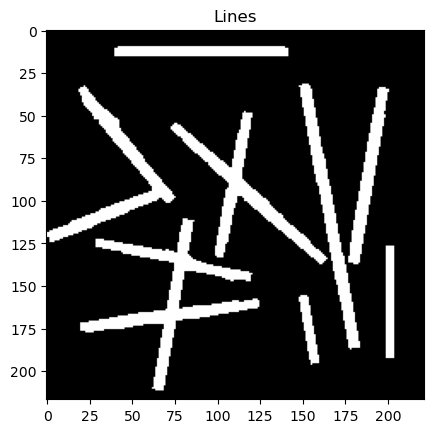

True

In [46]:
# Make our pixels' intensity binary :)) #
for i in range(0, result.shape[0]):
    for j in range(0, result.shape[1]):
        if (result[i][j][0] > 10):
            result[i][j][:] = 255
        else:
            result[i][j][:] = 0

# Use CLOSING to fill lines           
closing = cv2.morphologyEx(result, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2)))

# Show & Save Lines
plt.imshow(closing)
plt.title("Lines")
plt.show()
cv2.imwrite('Lines.png', closing)